In [41]:
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

tf.__version__ # 2.3.0 버전은 Session을 정의하고 Run 해주는 과정 생략
#sess=tf.Session()


'2.3.0'

## w 변화에 따른 sigmoid 함수의 특성

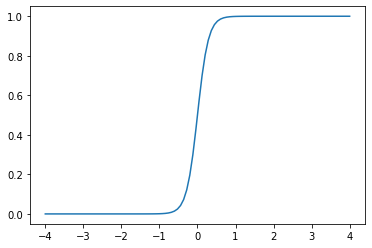

In [37]:
# 1. w 변화에 따른 sigmoid 함수의 특성
w=7
b=0.0
x=np.linspace(-4,4,100)

h=w*x+b
# y=1 / (1 + np.exp(-h)) # 밑에 코드와 동일한 값
y=tf.sigmoid(h)

plt.plot(x,y)

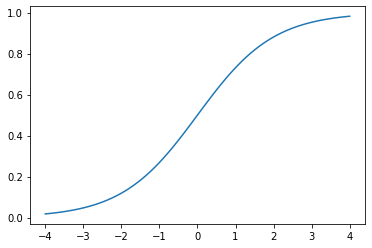

In [38]:
# 2. w 변화에 따른 sigmoid 함수의 특성
w=1.0
b=0.0
x=np.linspace(-4,4,100)

h=w*x+b
# y=1 / (1 + np.exp(-h)) # 밑에 코드와 동일한 값
y=tf.sigmoid(h)

plt.plot(x,y)

#### w가 커지면 계단 함수에 가까워지고 w가 0에 가까이 가면 거의 직선을 이룸

6.914400106935423e-13 0.9999999999993086
0.01798620996209156 0.9820137900379085
0.401312339887548 0.5986876601124521


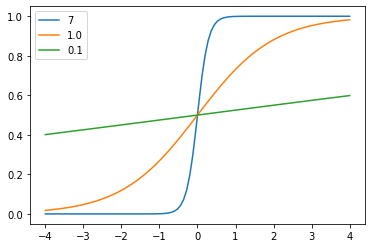

In [11]:
# 3
ws = [7, 1.0, 0.1] # w 값
for i in range(3):
    b=0.0
    w=ws[i]
    x=np.linspace(-4,4,100)
    
    h = w * x +b
    y = tf.sigmoid(h)
    
    plt.plot(x,y)
    
    print(np.min(y), np.max(y))
plt.legend(ws)

## b에 따른 sigmoid 함수 특성


0 0.01798620996209156 0.9820137900379085
-0.5 0.01098694263059318 0.9706877692486436
0.5 0.02931223075135632 0.9890130573694068


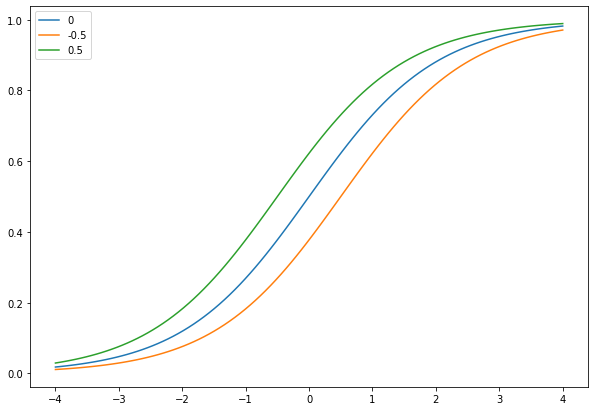

In [12]:
# b는 함수가 좌우로 얼마나 움직이는지
plt.figure(figsize=(10,7))

bs=[0, -0.5, 0.5]
for i in range(3):
    b=bs[i]
    w=1
    x=np.linspace(-4,4,100) # -4에서 4까지 100개의 샘플
    h=w * x +b
    y=tf.sigmoid(h)
    
    plt.plot(x,y)
    
    print(b,np.min(y),np.max(y))
plt.legend(bs)

## log 함수 그려보기
- tf.math.log()

tf.Tensor(inf, shape=(), dtype=float64)
tf.Tensor(0.0, shape=(), dtype=float64)


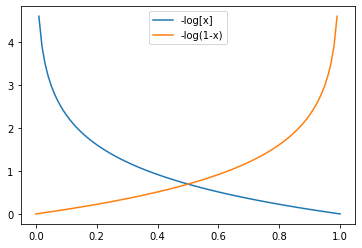

In [18]:
x=np.linspace(0,1,100) # 0에서 1까지 100개의 샘플

h=w * x +b
y=-tf.math.log(x)
plt.plot(x,y)
print(y[0])

y2=-tf.math.log(1-x)
plt.plot(x,y2)
print(y[99])

plt.legend(['-log[x]', '-log(1-x)'])


tf.Tensor(11.512925464970229, shape=(), dtype=float64)
tf.Tensor(-9.999950000398841e-06, shape=(), dtype=float64)


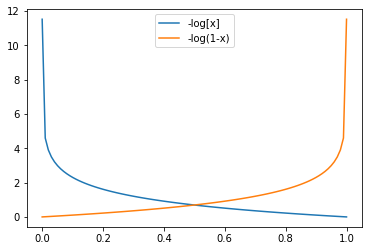

In [19]:
x=np.linspace(0,1,100) # 0에서 1까지 100개의 샘플

h=w * x +b
y=-tf.math.log(x+0.00001) # log(0)이 계산되지 않게 하기위해 매우 작은 값을 더해준다.
plt.plot(x,y)
print(y[0])

y2=-tf.math.log(1-x+0.00001)
plt.plot(x,y2)
print(y[99])

plt.legend(['-log[x]', '-log(1-x)'])

## sigmoid 함수에 대한 cost 함수 특성

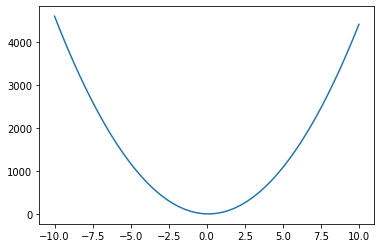

In [20]:
ws = np.linspace(-10,10,50) # 범위
x_data = np.array([1, 2.4, 3.1, 4.1, 6.3, 7.8, 8.43, 9.6, 10.4]) # 학습 데이터 
y_data = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])

cost=[]
for w in ws:
    h=w*x_data
    v=(h-y_data)**2
    cost.append(np.mean(v))
plt.plot(ws,cost)

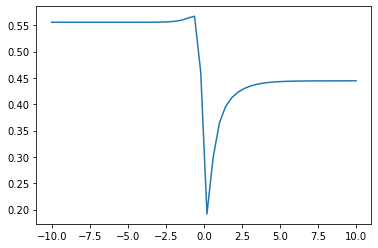

In [22]:
# 기울기 값이 0인 부분은 학습이 제대로 되지않는다.

ws = np.linspace(-10,10,50) # 범위
x_data = np.array([1, 2.4, 3.1, 4.1, 6.3, 7.8, 8.43, 9.6, 10.4]) # 학습 데이터 
y_data = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])

cost=[]
for w in ws:
    h=w*x_data
    y1=tf.sigmoid(h)
    v=(y1-y_data)**2
    cost.append(np.mean(v))
plt.plot(ws,cost)

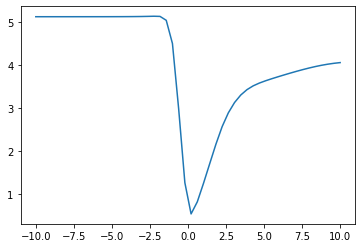

In [27]:
# cost 함수를 log함수를 사용한 cost로 바꿈
# 경사하강법을 통해 글로벌한 최저점을 찾을 수 있음


ws = np.linspace(-10,10,50) # 범위
x_data = np.array([1, 2.4, 3.1, 4.1, 6.3, 7.8, 8.43, 9.6, 10.4]) # 학습 데이터 
y_data = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])

cs=[]
for w in ws:
    h=w*x_data
    y=tf.sigmoid(h)
    cost= -tf.math.reduce_mean(y_data * tf.math.log(y+10e-5) + (1-y_data) * tf.math.log(1-y+10e-5))
    cs.append(cost)
plt.plot(ws,cs)

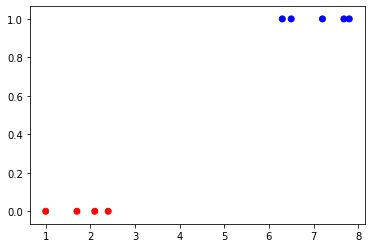

In [28]:
## 가상의 데이터를 이용해 로지스틱 회귀 수행

x_data = np.array([1.0, 2.4, 2.1, 1.7, 6.3, 7.8, 7.2, 7.68, 6.5]) # 학습 데이터 
y_data = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])

colors = ["red" if i == 0 else "blue" for i in y_data] # y가 0인 부분은 빨간색 y가 1인 부부은 파란색
plt.scatter(x_data, y_data, color=colors)

## 실제 분석

In [49]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import time

In [51]:
data = pd.read_excel("최고점기준_병합.test1.xlsx")
data

,SLOPE_AVG,PUMP_RATIO,IMP_SUR_RATIO,MANHOLES_COUNT,HOUR_RAINFALL,FLUD_DWPT,FLOOD
0,1.0,1.485884e-07,38.20,7602,3.5,0.0000,0
1,1.0,1.485884e-07,38.20,7602,8.5,0.1443,0
2,1.0,1.485884e-07,38.20,7602,39.0,0.2886,1
3,1.0,1.485884e-07,38.20,7602,78.0,0.4330,1
4,4.5,0.000000e+00,61.44,1593,3.5,0.0000,0
...,...,...,...,...,...,...,...
818,22.5,2.102446e-07,27.63,8794,36.5,0.0000,0
819,22.5,2.102446e-07,27.63,8794,5.3,0.0000,0
820,22.5,2.102446e-07,27.63,8794,6.5,0.0000,0
821,11.0,2.102446e-07,27.63,8625,78.0,0.0000,0


### 설명변수(X), 타겟변수(Y) 분리 및 학습데이터와 평가데이터

In [100]:
## 설명변수(X), 타겟변수(Y) 분리 
feature_columns = list(data.columns.difference(["FLOOD"]))
X = data[feature_columns]
y = data["FLOOD"]
print(X.shape, y.shape)

(823, 6) (823,)


In [101]:
## 학습데이터, 평가데이터 나누기
train_x, test_x, train_y, test_y = train_test_split(X, y,stratify=y, test_size=0.3, train_size = 0.7, random_state=42)
                                                   
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(576, 6) (247, 6) (576,) (247,)


## 2. 로지스틱 회귀 모델 학습

In [102]:
model = sm.Logit(train_y, train_x)
results = model.fit(method='newton')

         Current function value: 0.051178
         Iterations: 35


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [88]:
# 결과 확인
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  FLOOD   No. Observations:                  576
Model:                          Logit   Df Residuals:                      570
Method:                           MLE   Df Model:                            5
Date:                Thu, 27 Aug 2020   Pseudo R-squ.:                  0.9219
Time:                        17:40:56   Log-Likelihood:                -29.479
converged:                      False   LL-Null:                       -377.30
Covariance Type:            nonrobust   LLR p-value:                4.290e-148
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
FLUD_DWPT         57.7924     10.359      5.579      0.000      37.489      78.096
HOUR_RAINFALL      0.0066      0.020      0.329      0.742      -0.033       0.046
IMP_SUR_RATIO     -0.1588      0.033     -4.796      0.000      -0.224      -0.094
MANHOLES_COUNT    -0.0007      0.000     -4.726      0.000      -0.001      -0.000
PUMP_RATIO       220.2918    2.6e+06   8.47e-05      1.000    -5.1e+06     5.1e+06
SLOPE_AVG         -0.1147      0.051     -2.228      0.026      -0.216      -0.014
==================================================================================

Possibly complete quasi-separation: A fraction 0.70 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [90]:
## 회귀계수 확인
results.params

FLUD_DWPT          57.792357
HOUR_RAINFALL       0.006593
IMP_SUR_RATIO      -0.158763
MANHOLES_COUNT     -0.000739
PUMP_RATIO        220.291783
SLOPE_AVG          -0.114690
dtype: float64

In [91]:
## 테스트 데이터 학습
pred_y = results.predict(test_x)
pred_y

618    2.398531e-06
535    6.718611e-05
399    5.217908e-01
790    1.093857e-07
627    2.950416e-06
           ...     
729    1.423355e-06
321    1.000000e+00
176    1.901658e-05
649    5.617659e-07
219    1.551027e-01
Length: 247, dtype: float64

In [103]:
### 로지스틱 회귀의 thershold 설정 및 성능 확인
def cut_off(y,threshold):
    thershold=0
    Y = y.copy()
    Y[Y>threshold] = 1
    Y[Y<=threshold]=0
    return(Y.astype(int))

pred_Y = cut_off(pred_y, 0.5)
pred_Y

618    0
535    0
399    1
790    0
627    0
      ..
729    0
321    1
176    0
649    0
219    0
Length: 247, dtype: int64

In [105]:
## 혼동 행렬
cfmat = confusion_matrix(test_y, pred_Y)
print(cfmat)

[[153   4]
 [  1  89]]


In [106]:
## 전체 합분에 가운데 해당하는 값이 정확도
(cfmat[0,0] + cfmat[1,1])/np.sum(cfmat)

0.979757085020243

In [107]:
## 정확도 구하는 함수 만들기
def acc(cfmat):
    acc = (cfmat[0,0] + cfmat[1,1])/np.sum(cfmat)
    return(acc)

In [110]:
## 임계값에 따른 성능지표
threshold = np.arange(0,1,0.2)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(test_y,pred_y)
    table.loc[i] = acc(cfmat)
table.index.name = 'threshold'
table.columns.name = 'performance'
table

ValueError: Classification metrics can't handle a mix of binary and continuous targets